# Proyecto 1: Regresión Lineal

Es este primer proyecto realizaremos una regresión lineal simple y lo graficaremos para tener unos apuntes guía para futuras investigaciones.

In [1]:
import pandas as pd 
import seaborn as sbn
import numpy as np

## Datos

Ingresamos los datos que vamos a usar y los juntamos en un solo DF

In [2]:
PBI=pd.read_csv(r"D:\Data\BCRP\Trimestrales-20200824-134253.csv",header=1,index_col=0)
INGRESO=pd.read_csv(r"D:\Data\BCRP\Trimestrales-20200824-134910.csv",header=1,index_col=0)
GASTO=pd.read_csv(r"D:\Data\BCRP\Trimestrales-20200824-134824.csv",header=1,index_col=0)
PBI["INGRESO"]=INGRESO["Ingresos corrientes del gobierno general (porcentaje del PBI) - Ingresos Corrientes del GG - Ingresos no Tributarios (% PBI)"]
PBI["GASTO"]=GASTO['Gastos no financieros del gobierno general (porcentaje del PBI) - Gastos Corrientes']
PBI.rename(columns = {"Producto bruto interno (variaciones porcentuales) - PBI Global":"PBI"},inplace=True)
PBI.head(25)

,PBI,INGRESO,GASTO
T100,6.756250,n.d.,n.d.
T200,4.931338,n.d.,n.d.
T300,2.680012,n.d.,n.d.
T400,-3.177518,n.d.,n.d.
T101,-5.330526,n.d.,n.d.
T201,0.301282,n.d.,n.d.
T301,2.742307,n.d.,n.d.
T401,4.782608,n.d.,n.d.
T102,6.525020,n.d.,n.d.
T202,6.633736,n.d.,n.d.


### Eliminamos n.d.

In [3]:
indexNames = PBI[PBI['GASTO'] == "n.d."].index
PBI.drop(indexNames , inplace=True)

PBI

,PBI,INGRESO,GASTO
T106,8.283806,4.58397587860248,13.2244941786155
T206,6.329469,3.6041727711478,12.3230419111471
T306,8.294597,4.3802625228719,13.7514597880226
T406,7.324218,3.881703181782,15.9024871032248
T107,5.286376,4.33300571589526,12.3063672304653
T207,6.332691,3.66882966197162,12.4474595030474
T307,10.827106,4.23531242343926,13.8333542610623
T407,11.439006,4.16776720616397,15.8498976262859
T108,10.168902,4.51455044194428,13.3570505697522
T208,10.568367,4.19398549093066,13.1109575389977


## Cambiando el formato
Como la data vino con n.d. se le tiene que cabiar a formato "float", volver todo trimestral (period_range) pero como cuenta de tiempo (timestamp) para que todos los graficos lo pueda identificar

In [4]:
PBI["INGRESO"]=PBI["INGRESO"].astype(float)
PBI["GASTO"]=PBI["GASTO"].astype(float)
PBI.index =pd.period_range('2006Q1', '2020Q1', freq='Q').to_timestamp()

### Guardar la data como Excel

In [5]:
PBI.to_excel(r"D:\Data\BCRP\PBI.xlsx")

### Guardar la data como CSV

In [6]:
PBI.to_csv(r"D:\Data\BCRP\PBI.csv")

## Regresión

Ahora que tenemos los datos realizamos una regresión lineal

In [7]:
import statsmodels.api as sm
import numpy as np 

In [8]:
y= PBI["PBI"]
x= PBI[["INGRESO","GASTO"]]
x = sm.add_constant(x)

modelo = sm.OLS(y, x)

residuo = modelo.fit()

residuo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PBI   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     3.307
Date:                Mon, 24 Aug 2020   Prob (F-statistic):             0.0442
Time:                        18:57:11   Log-Likelihood:                -141.70
No. Observations:                  57   AIC:                             289.4
Df Residuals:                      54   BIC:                             295.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.7439      7.281      2.712      0.009       5.146      34.342
INGRESO       -1.1409      1.040     -1.097      0.278      -3.227       0.945
GASTO         -0.6762      0.264     -2.563      0.013      -1.205      -0.147
==============================================================================
Omnibus:                        0.548   Durbin-Watson:                   0.767
Prob(Omnibus):                  0.760   Jarque-Bera (JB):                0.128
Skew:                           0.071   Prob(JB):                        0.938
Kurtosis:                       3.183   Cond. No.                         283.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
y_hat= residuo.predict(x)
PBI["PREDICCIÓN"]=y_hat

In [10]:
PBI.head()

,PBI,INGRESO,GASTO,PREDICCIÓN
2006-01-01,8.283806,4.583976,13.224494,5.571196
2006-04-01,6.329469,3.604173,12.323042,7.298665
2006-07-01,8.294597,4.380263,13.751460,5.447271
2006-10-01,7.324218,3.881703,15.902487,4.561513
2007-01-01,5.286376,4.333006,12.306367,6.478395


## Graficos

Ahora que ya tenemos todo, veremos la graficación de la información

In [11]:
import matplotlib.pyplot as plt

### Grafico de Var% PBI

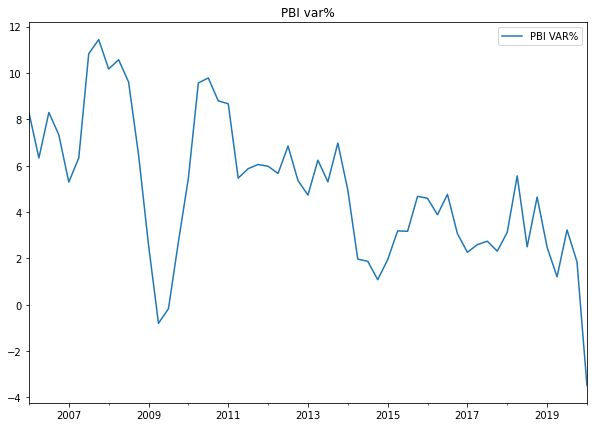

In [12]:
PBI["PBI"].plot(figsize=(10, 7),label="PBI VAR%")
plt.title("PBI var%")
plt.legend(loc="best")

## Grafico de la regresión

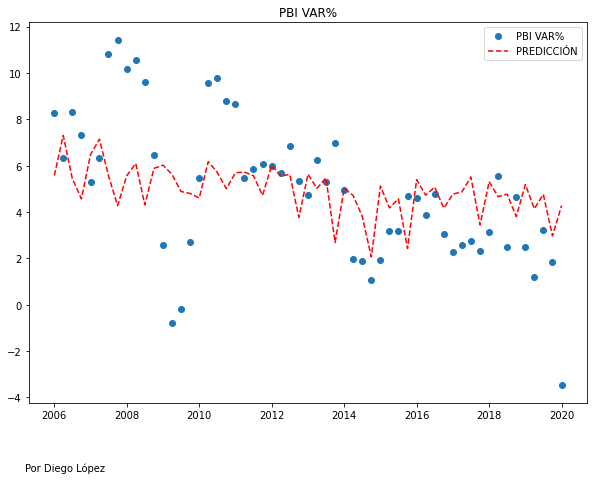

In [13]:
from pandas.plotting import lag_plot
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(PBI.index,PBI["PBI"], 'o', label="PBI VAR%")
ax.plot(PBI.index,PBI["PREDICCIÓN"], 'r--', label="PREDICCIÓN")
plt.title("PBI VAR%")
plt.figtext(0.12,-.01,"Por Diego López")
ax.legend(loc=1);